In [1]:
import pandas as pd
import pickle

def load_and_parse_data(file_path):
    """
    Loads and parses the data from a CSV file into a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the CSV file.
        
    Returns:
        pd.DataFrame: A DataFrame containing the parsed data.
    """
    try:
        # Load the CSV file into a DataFrame
        data = pd.read_csv(file_path, header=0)
        return data
    
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None
    except pd.errors.ParserError as e:
        print(f"Error: Could not parse the file. Details: {e}")
        return None

# Example usage:
file_path = "with_gas_en_data.csv"  # Replace with the path to your data file
df = load_and_parse_data(file_path)

if df is not None:
    print("Data successfully loaded and parsed!")
    print(df.head())

Data successfully loaded and parsed!
       participantId  gender  age  hpNum  hpTestMethod  hpDetail  cancer  \
0  62060210120162866       0   51    0.0           0.0       0.0       1   
1  62060210120165424       0   58  211.0           0.0       1.0       1   
2  62060210120173748       0   61    0.0           0.0       0.0       1   
3  62060210120176671       0   60    0.0           0.0       0.0       1   
4  62060210120183731       0   59   63.0           0.0       0.0       1   

   registryType  heightInCm  weightInKg  ...  总胆红素[TBIL]  甘油三酯[TG]  \
0             0         171          64  ...         6.7      1.22   
1             0         174          68  ...        14.0      2.42   
2             0         169          79  ...        12.5      1.43   
3             0         175          65  ...         9.0      3.03   
4             0         177          70  ...        42.1      0.91   

   直接胆红素[DBIL]  肌酐[Crea]  胃蛋白酶原1  胃蛋白酶原2  葡萄糖[Glu]  超敏C反应蛋白[hsCRP]  \
0          1.1 

In [2]:
def fill_by_cancer_means(df, cancer_col):
    # Iterate over all columns except the cancer column
    for col in df.columns:
        if col == cancer_col:
            continue  # Skip the cancer column itself
        
        # Fill NaN values based on the condition of the cancer column
        df[col] = df[col].fillna(
            df.groupby(cancer_col)[col].transform("mean")
        )
    return df

# Apply the function to the DataFrame
df = fill_by_cancer_means(df, "cancer")

In [3]:
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to a new DataFrame or overwrite the original
shuffled_df.to_csv("shuffled_data.csv", index=False)

# Print the shuffled DataFrame
print(shuffled_df)

          participantId  gender  age   hpNum  hpTestMethod  hpDetail  cancer  \
0     62060210321115415       1   42   639.0           0.0       1.0       4   
1     62060210320230373       0   48    78.0           0.0       0.0       2   
2     62060210120614273       0   46  1191.0           0.0       1.0       4   
3     62060210020151000       0   58     3.0           0.0       0.0       4   
4     62060210320484330       0   58    36.0           0.0       0.0       2   
...                 ...     ...  ...     ...           ...       ...     ...   
2979  62060210320313827       0   53   116.0           0.0       1.0       5   
2980  62060210121118110       0   54    68.0           0.0       0.0       4   
2981  62060210121135558       0   46   139.0           0.0       1.0       4   
2982  62060210320001204       0   56    15.0           0.0       0.0       4   
2983  62060210120602544       0   45     0.0           0.0       0.0       4   

      registryType  heightInCm  weightI

In [4]:
shuffled_df["cancer"] = shuffled_df['cancer'].apply(lambda x: x - 1)
shuffled_df["cancer"] = shuffled_df['cancer'].apply(lambda x: 4 if x == 5 else x)

In [5]:
shuffled_df.tail()

,participantId,gender,age,hpNum,hpTestMethod,hpDetail,cancer,registryType,heightInCm,weightInKg,...,总胆红素[TBIL],甘油三酯[TG],直接胆红素[DBIL],肌酐[Crea],胃蛋白酶原1,胃蛋白酶原2,葡萄糖[Glu],超敏C反应蛋白[hsCRP],间接胆红素[IBIL],高密度脂蛋白胆固醇[HDL-C]
2979,62060210320313827,0,53,116.0,0.0,1.0,4,0,165,72,...,16.400000,1.800000,4.300000,62.200000,77.158611,15.356667,5.270000,1.000000,12.100000,2.36000
2980,62060210121118110,0,54,68.0,0.0,0.0,3,0,165,59,...,12.898545,1.713677,2.889947,62.331878,77.019980,17.514008,4.852659,1.946825,10.008598,1.18791
2981,62060210121135558,0,46,139.0,0.0,1.0,3,0,168,55,...,7.300000,1.420000,1.500000,55.800000,69.150000,13.040000,4.210000,1.400000,5.800000,1.24000
2982,62060210320001204,0,56,15.0,0.0,0.0,3,0,165,70,...,13.500000,2.180000,2.100000,46.300000,37.380000,20.880000,6.200000,3.300000,11.400000,0.73000
2983,62060210120602544,0,45,0.0,0.0,0.0,3,0,160,70,...,18.600000,2.090000,4.000000,77.200000,77.019980,17.514008,4.350000,0.500000,14.600000,1.23000


Hello!
[6.20602103e+16 1.00000000e+00 4.20000000e+01 6.39000000e+02
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.70000000e+02
 7.00000000e+01 1.20000000e+02 8.00000000e+01 3.70000000e+01
 9.50000000e+01 1.01000000e+02 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 4.00000000e+00 1.00000000e+01
 6.00000000e+00 1.00000000e+00 4.00000000e+00 0.00000000e+00
 4.00000000e+00 2.00000000e+00 6.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 1.00000000e+00 2.00000000e+00
 4.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00
 0.00000000e+00 1.00000000e+00 6.00000000e+00 0.00000000e+00
 2.00000000e+00 0.00000000e+00 7.00000000e+00 0.00000000e+00
 6.00000000e+00 0.00000000e+00 6.00000000e+00 2.00000000e+00
 5.00000000e+00 0.00000000e+00 2.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1

/tmp/ipykernel_1038/2014696599.py:131: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_with_gas_5.pt'))


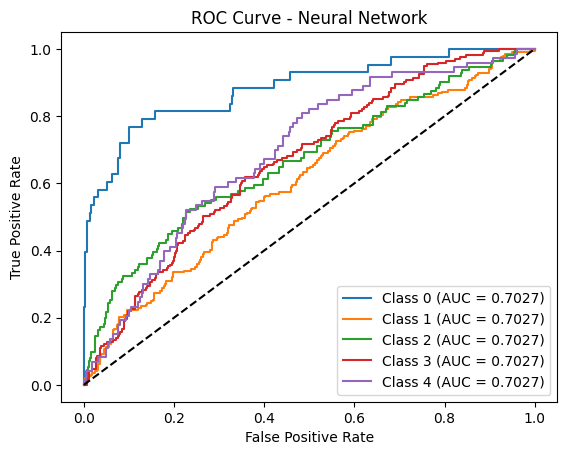

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Test Accuracy: 41.04%

Confusion Matrix (Logistic Regression):
[[27  7  1  8  0]
 [ 7 75 38 55 22]
 [ 4 32 41 25  9]
 [ 8 49 17 80 19]
 [ 4 16  9 22 22]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     Class 0       0.54      0.63      0.58        43
     Class 1       0.42      0.38      0.40       197
     Class 2       0.39      0.37      0.38       111
     Class 3       0.42      0.46      0.44       173
     Class 4       0.31      0.30      0.30        73

    accuracy                           0.41       597
   macro avg       0.41      0.43      0.42       597
weighted avg       0.41      0.41      0.41       597

ROC AUC Score (Logistic Regression): 0.7086


In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Additional imports for new ML methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assume 'shuffled_df' is your DataFrame containing the data
data = shuffled_df.copy()
X = data.drop("cancer", axis=1).values
print("Hello!")
print(X[0])
y = data["cancer"].values

# Standardize the feature set
scaler = StandardScaler()
print(f"scaler = {scaler}")
X = scaler.fit_transform(X)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Define the number of classes (assuming labels are from 0 to 4)
num_classes = 5

# Split into train, validation, and test sets for scikit-learn models
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_test_sk[0])
X_train_sk, X_val_sk, y_train_sk, y_val_sk = train_test_split(
    X_train_sk, y_train_sk, test_size=0.1, random_state=42, stratify=y_train_sk
)

# Convert to PyTorch tensors for the neural network
X_train_nn = torch.tensor(X_train_sk, dtype=torch.float32)
y_train_nn = torch.tensor(y_train_sk, dtype=torch.long)
X_val_nn = torch.tensor(X_val_sk, dtype=torch.float32)
y_val_nn = torch.tensor(y_val_sk, dtype=torch.long)
X_test_nn = torch.tensor(X_test_sk, dtype=torch.float32)
y_test_nn = torch.tensor(y_test_sk, dtype=torch.long)

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)  # Output for num_classes classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x  # Return raw logits

# Initialize model, loss function, and optimizer
input_size = X_train_nn.shape[1]
model = NeuralNetwork(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training with early stopping
NN_epochs = 20
batch_size = 32
best_val_loss = float('inf')
patience = 5
trigger_times = 0

for epoch in range(NN_epochs):
    model.train()
    for i in range(0, len(X_train_nn), batch_size):
        X_batch = X_train_nn[i:i+batch_size]
        y_batch = y_train_nn[i:i+batch_size]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for i in range(0, len(X_val_nn), batch_size):
            X_val_batch = X_val_nn[i:i+batch_size]
            y_val_batch = y_val_nn[i:i+batch_size]
            val_outputs = model(X_val_batch)
            val_loss += criterion(val_outputs, y_val_batch).item()
    val_loss /= (len(X_val_nn) // batch_size)

    # Print loss every epoch
    print(f"Epoch {epoch + 1}/{NN_epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model_with_gas_5.pt')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}!")
            break

# Load the best model
model.load_state_dict(torch.load('best_model_with_gas_5.pt'))

# Evaluate the neural network on the test set
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_nn)
    y_pred_classes_nn = torch.argmax(y_pred_nn, axis=1)
    y_pred_probs_nn = torch.softmax(y_pred_nn, dim=1).cpu().numpy()

# Convert tensors to NumPy arrays for metrics
y_pred_classes_nn_np = y_pred_classes_nn.cpu().numpy()
y_test_np = y_test_sk

# Binarize the test labels for multi-class ROC AUC computation
y_test_binarized = label_binarize(y_test_np, classes=range(num_classes))

# Calculate evaluation metrics for the neural network
accuracy_nn = accuracy_score(y_test_np, y_pred_classes_nn_np)
conf_matrix_nn = confusion_matrix(y_test_np, y_pred_classes_nn_np)
class_report_nn = classification_report(y_test_np, y_pred_classes_nn_np, target_names=[f"Class {i}" for i in range(num_classes)])
roc_auc_nn = roc_auc_score(y_test_binarized, y_pred_probs_nn, multi_class="ovr")

print(f"\nNeural Network Test Accuracy: {accuracy_nn * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix_nn)
print("\nClassification Report:")
print(class_report_nn)
print(f"ROC AUC Score (Neural Network): {roc_auc_nn:.4f}")

# Plot ROC Curve for each class (Neural Network)
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_probs_nn[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_nn:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

# Add ML methods (Logistic Regression, Naive Bayes, XGBoost, KNN)
# The additional methods are the same as provided earlier, adapted for the corrected splits.
# All ML methods are implemented below.

# Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_sk, y_train_sk)
y_pred_logreg = logreg.predict(X_test_sk)
y_pred_probs_logreg = logreg.predict_proba(X_test_sk)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(y_test_sk, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test_sk, y_pred_logreg)
class_report_logreg = classification_report(y_test_sk, y_pred_logreg, target_names=[f"Class {i}" for i in range(num_classes)])
roc_auc_logreg = roc_auc_score(y_test_binarized, y_pred_probs_logreg, multi_class="ovr")

# Print evaluation metrics for Logistic Regression
print(f"\nLogistic Regression Test Accuracy: {accuracy_logreg * 100:.2f}%")
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)
print("\nClassification Report (Logistic Regression):")
print(class_report_logreg)
print(f"ROC AUC Score (Logistic Regression): {roc_auc_logreg:.4f}")

In [7]:
from xgboost import XGBClassifier

# Define a reusable evaluation function
def evaluate_model(y_true, y_pred, y_probs, model_name, num_classes):
    """
    Evaluate a classification model and print metrics.
    
    Parameters:
        y_true: Ground truth labels
        y_pred: Predicted class labels
        y_probs: Predicted probabilities for each class
        model_name: Name of the model (string)
        num_classes: Number of target classes
    """
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(
        y_true, y_pred, target_names=[f"Class {i}" for i in range(num_classes)]
    )
    roc_auc = roc_auc_score(label_binarize(y_true, classes=range(num_classes)), y_probs, multi_class="ovr")
    
    print(f"\n{model_name} Test Accuracy: {accuracy * 100:.2f}%")
    print(f"\nConfusion Matrix ({model_name}):")
    print(conf_matrix)
    print(f"\nClassification Report ({model_name}):")
    print(class_report)
    print(f"ROC AUC Score ({model_name}): {roc_auc:.4f}")#-----------------
# XGBoost Evaluation
# -----------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_sk, y_train_sk)
y_pred_xgb = xgb_model.predict(X_test_sk)
y_probs_xgb = xgb_model.predict_proba(X_test_sk)
xgb_model.save_model('xgb_model.json')
print(X_test_sk[0])

# Call the evaluation function for XGBoost
evaluate_model(y_test_sk, y_pred_xgb, y_probs_xgb, "XGBoost", num_classes)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:13:37] WARNING: /home/coder/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[-0.12076452 -0.89733085 -0.18005552  0.57661932 -0.06380781  0.97124404
 -0.05184758 -1.20901989 -0.54392328 -0.26733503  0.18213379 -0.37911239
 -1.30637325 -1.34438415 -0.21017011  2.38894891 -0.19548623 -0.36701641
 -0.41983364 -0.00504317 -1.4627819  -0.41409172 -0.42667148 -1.3053714
 -0.04263259 -1.62354446 -2.18241517 -1.566558   -0.54503849 -0.66137064
 -1.07926385 -1.46339889 -0.88145863 -1.65779103 -0.59780696 -0.73548295
  0.32341198 -0.35294844 -0.44934945 -0.56350566 -0.52496079 -0.59706707
 -1.48775816 -1.05638373 -0.66484011 -0.88590828 -0.79433656  0.20869432
 -0.75825673  0.33775814 -0.94098436 -0.82789871 -0.96342048 -0.84602478
 -0.92508375 -1.03193525 -1.54085773 -0.78086581 -0.50748049 -1.22025064
 -0.80621371 -1.01001102 -0.99709438 -1.14492156  0.69774768 -1.10906762
 -0.54919055 -0.62982312 -1.62227805 -1.81017903 -1.21272691 -1.11816487
 -1.24518838 -1.2610798  -1.40739824 -1.67086899 -1.28290775 -0.81939997
 -0.89770096 -1.08845849 -1.36061485 -0.88964092 -0.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -----------------
# Random Forest Evaluation
# -----------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sk, y_train_sk)
y_pred_rf = rf_model.predict(X_test_sk)
y_probs_rf = rf_model.predict_proba(X_test_sk)

# Call the evaluation function for Random Forest
evaluate_model(y_test_sk, y_pred_rf, y_probs_rf, "Random Forest", num_classes)

# -----------------
# SVM Evaluation
# -----------------
# SVM doesn't provide probabilities directly. Use decision function and Platt scaling for probability estimation.
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_sk, y_train_sk)
y_pred_svm = svm_model.predict(X_test_sk)
y_probs_svm = svm_model.predict_proba(X_test_sk)

# Call the evaluation function for SVM
evaluate_model(y_test_sk, y_pred_svm, y_probs_svm, "SVM", num_classes)


Random Forest Test Accuracy: 84.76%

Confusion Matrix (Random Forest):
[[ 30  13   0   0   0]
 [  0 193   0   4   0]
 [  0  31  79   1   0]
 [  0  36   1 136   0]
 [  0   4   0   1  68]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

     Class 0       1.00      0.70      0.82        43
     Class 1       0.70      0.98      0.81       197
     Class 2       0.99      0.71      0.83       111
     Class 3       0.96      0.79      0.86       173
     Class 4       1.00      0.93      0.96        73

    accuracy                           0.85       597
   macro avg       0.93      0.82      0.86       597
weighted avg       0.89      0.85      0.85       597

ROC AUC Score (Random Forest): 0.9714

SVM Test Accuracy: 40.20%

Confusion Matrix (SVM):
[[ 11  24   0   8   0]
 [  0 134   4  59   0]
 [  0  58  11  42   0]
 [  0  86   3  84   0]
 [  0  32   0  41   0]]

Classification Report (SVM):
              precision    recall  f1-score   s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
